<a href="https://colab.research.google.com/github/AyaseErii/Hardware_for_modern_day_computing/blob/main/Q8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question part 1**

Plot all the distribution of states for all possible values of H.  

Given 20 nodes, there are 524288 combinations in total.
Frequency distribution is shown below:


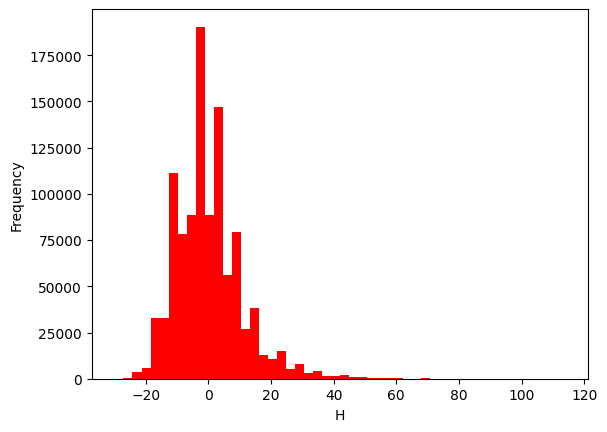

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# Get the adjacency matrix
adj_matrix = pd.read_excel('Adjacency_Matrix_Q8B.xlsx')
adj_matrix = np.array(adj_matrix)

# Generate all combinations of node with given length of adj_matrix
combinations = list(itertools.product([-1, 1], repeat=len(adj_matrix)))

# Calculate H and put all H in a list H_lis
def ising_hamiltonian(adj_matrix, combinations):
    H_lis = []
    for S in combinations:
      H = 0
      for i in range(len(S)):
          for j in range(i+1, len(S)):
              if adj_matrix[i][j] == 1:
                  H += S[i] * S[j]
      H_lis.append(H)
    return H_lis

# Return a H_lis with L
L = ising_hamiltonian(adj_matrix, combinations)

print("Given %d nodes, there are %d combinations in total." % (len(adj_matrix), len(L)/2))

print("Frequency distribution is shown below:")

# Plot the frequency distribution
plt.hist(L, bins=50, color="r")
plt.xlabel('H')
plt.ylabel('Frequency')
plt.show()

**Question part 2**

Subsequently, develop a code to randomly sample some nodes. These nodes form 1 set and the unselected nodes form another set. Find H. Repeat this process 100 times and plot the distribution of H observed. What is the minimum value of H observed over all the runs?

Here is the list of sampled 100 Hs: 
 [-4, -4, 22, 2, 10, -14, -16, 0, -8, 12, -6, -2, 2, 0, 54, 6, 2, 2, -6, -2, -4, -6, 10, 10, -22, -4, 0, 4, 12, 8, -6, -4, 14, -14, 24, -18, -4, 20, 4, -2, 0, -4, 6, -18, -6, -4, -12, -6, 10, -12, 10, -4, 10, 6, -16, -10, 28, -8, 2, 8, -16, -6, -2, -14, -6, 0, -6, -4, 8, 2, -6, -8, -16, 12, -2, 14, -12, -6, -4, -10, 2, 12, -2, -12, -6, -6, -4, 2, 20, 6, -8, 6, -2, -16, -16, 4, -4, -10, -2, -6]
The minimum value of H observed over all the runs is: -22.


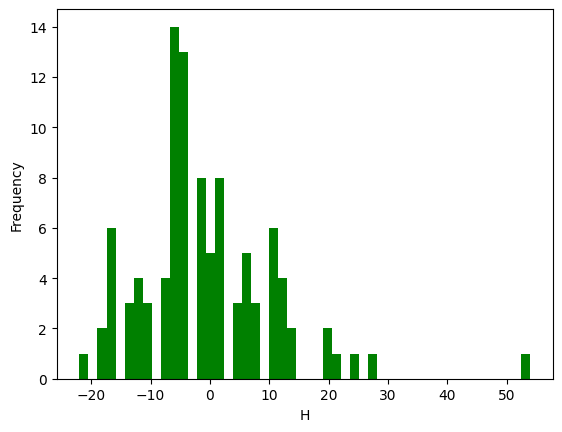

In [13]:
import random


comb = []
for i in range(int(len(combinations)/2)):
  comb.append(combinations[i])

# Define a sampling function
def sampling(comb, n, seeds):
    random.seed(seeds)
    sampled_lis = random.sample(comb, n)
    return sampled_lis


# Put seeds to generate the a specific list
seeds = 1

# Set run time is 100
n = 100

# Start sampling
Sample_sigma_lis = sampling(comb, n, seeds)

# Calculate H, put all H in a list H_lis and return the results into a list
sub_H_lis = ising_hamiltonian(adj_matrix, Sample_sigma_lis)
print("Here is the list of sampled 100 Hs: \n %s" % (sub_H_lis))

# Find the min H from the sampling pool
min_H = min(sub_H_lis)
print("The minimum value of H observed over all the runs is: %d." % min_H)

# Plot the frequency distribution of the sampling
plt.hist(sub_H_lis, bins=50, color="green")
plt.xlabel('H')
plt.ylabel('Frequency')
plt.show()   